# サポート・ベクター・マシーン（Support Vector Machine:SVM)

## サポートベクトルマシーンとは
- 教師あり学習を用いるパターン認識モデルの1つ
- 分類や回帰へ適用できる
- 分類の場合、線形分離不可能なタイプのものも分離可能

### サポートベクトルマシンによる分類
- **サポートベクター**　…　境界に最も近い点のこと
- **マージン** …　サポートベクトルと境界との距離
- SVMではマージンを最大化する

<div>
<img src="img/svm.png">
</div>

### ソフトマージンSVM
- 誤差を容認するSVMによる分類
- 通常のデータにはノイズが入っているので、この方法を用いるのが普通


### カーネル法
- ロジスティック回帰のように線形分離できない問題に適用可能
- データを変換することで、非線形構造を線形構造に変換する
- 関数を用いて2次元の空間を3次元に拡張し、平面で分割できるようにする

<div>
<img src="img/dimension_extension.png">
</div>

## 1.データの準備

### sample1
- 乳癌のデータの読み込み
- pandasへ移行

In [1]:
import pandas as pd
import numpy as np
# 乱数のシードを0に設定
np.random.seed(0)
#scikit-learnより癌のデータを抽出する
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
#癌のデータ（説明変数）をXに格納する
df_X = pd.DataFrame(data=data.data,columns=data.feature_names)
df_X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

### sample2

In [2]:
#癌のデータ（目的変数）をYに格納する
df_Y = pd.DataFrame(data=data.target)
df_Y = df_Y.rename(columns={0: '判定(0:悪性 / 1:陽性)'})
df_Y.head()

判定(0:悪性 / 1:陽性)
0                0
1                0
2                0
3                0
4                0

### sample3
- 学習用・テスト用にデータを7:3に分割

In [3]:
# 学習用のnumpyのデータに変換
X = df_X.values
Y = df_Y.values.ravel()
from sklearn.model_selection import train_test_split
# データの分割を行う（訓練用データ 0.7 評価用データ 0.3）
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### sample4
- 学習用の説明変数

In [4]:
X_train

array([[1.149e+01, 1.459e+01, 7.399e+01, ..., 7.431e-02, 2.941e-01,
        9.180e-02],
       [1.049e+01, 1.861e+01, 6.686e+01, ..., 6.528e-02, 2.213e-01,
        7.842e-02],
       [1.225e+01, 1.794e+01, 7.827e+01, ..., 8.211e-02, 3.113e-01,
        8.132e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

### sample5
- 学習用の目的変数

In [5]:
Y_train

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

## 3.SVMによる分類
- scikit-learnでは、svmのSVCクラスを用いて行う
- 操作方法はロジスティック回帰の場合と変わらない

### sample6
- SVMの学習器の生成
- 学習と予測を行う

In [6]:
# Support Vector Machineによる分類
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

### sample7
- 予測を行う
- 結果から混同行列を得る

In [7]:
# X_testの値から予測結果を得る
Y_pred = clf.predict(X_test)
# 混同行列（confusion matrix）
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[ 51,  12],
       [  1, 107]], dtype=int64)

### sample8
- 正解率・適合率・再現率・F1スコアの取得

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# 各種パラメータの計算
print("正解率:{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred)))
print("適合率:{}".format(precision_score(y_true=Y_test, y_pred=Y_pred)))
print("再現率:{}".format(recall_score(y_true=Y_test, y_pred=Y_pred)))
print("F1スコア:{}".format(f1_score(y_true=Y_test, y_pred=Y_pred)))

正解率:0.9239766081871345
適合率:0.8991596638655462
再現率:0.9907407407407407
F1スコア:0.9427312775330395


### sample9
- 説明変数の標準化を行う

In [9]:
# 標準化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# 標準化のパラメータの取得
stdsc.fit(X)
# 訓練用のデータを標準化
X_train_std = stdsc.transform(X_train)
# 訓練用データを基準にテストデータも標準化
X_test_std = stdsc.transform(X_test)

### sample10
- 標準化データを用いた分析で混同行列を得る
- エラー率が下がっていることが分かる

In [10]:
clf = svm.SVC()
clf.fit(X_train_std, Y_train)
# X_test_stdの値から分割直線の式を得る
Y_pred_std = clf.predict(X_test_std)
confusion_matrix(y_true=Y_test, y_pred=Y_pred_std)

array([[ 60,   3],
       [  1, 107]], dtype=int64)

### sample11
- 標準化後の正解率・適合率・再現率・F1スコアの取得

In [11]:
# 各種パラメータの計算
print("正解率:{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred_std)))
print("適合率:{}".format(precision_score(y_true=Y_test, y_pred=Y_pred_std)))
print("再現率:{}".format(recall_score(y_true=Y_test, y_pred=Y_pred_std)))
print("F1スコア:{}".format(f1_score(y_true=Y_test, y_pred=Y_pred_std)))

正解率:0.9766081871345029
適合率:0.9727272727272728
再現率:0.9907407407407407
F1スコア:0.981651376146789


## 4.SVMにおけるグリッドサーチ
- モデルの精度を向上させるために用いられる手法
- 全てのパラメータの組み合わせを試してみる方法

### カーネル関数

- カーネル法で用いる関数
- ２次元→３次元のように、高次元にデータを写像し分離可能にする
- 様々な種類が存在する
    - RBF(ガウシアン)カーネル
    - 多項式カーネル
    - ほか
- **カーネルトリック** ･･･ カーネル関数を用いて計算量を減らすテクニック

### カーネル関数とハイパーパラメータ
- カーネル関数には様々なハイパーパラメータが存在する
- ハイパーパラメータの設定によってSVMの性能が決定される

### sample12
- ハイパーパラメータの取得
- **kerenel** …　使用しているカーネル関数の種類
- **C** … コストパラメータ（誤分類をどの程度許容するかを決めるパラメータで小さいほど誤分類を許容するように、大きいほど誤分類を許容しない）
- **gamma** … RBFカーネルのパラメータで、値が小さいほど単純な決定境界となり, 大きいほど複雑な決定境界となる
    - scale … 訓練データの数と特徴変数の分散から自動で計算

In [12]:
# ハイパーパラメータの取得
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### sample13
- グリッドサーチによるパラメータの取得
- Cおよびgammaを様々な組み合わせで試す
- 学習時には交差検証法を用いる
- 評価方法はaccuracyとする

In [13]:
# グリッドサーチでパラメータを取得
from sklearn.model_selection import GridSearchCV
# サーチするハイパーパラメータのグリッド
param_grid = {'C':[ 0.001, 0.01,0.1,1.0 ,10.0 ,100.0 ],
              'gamma': [ 0.00001, 0.0001, 0.001,0.01,0.1]}
# モデルsvdに作成したグリッド、交差検証戦略は5分化交差検証
grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy')
#  cv=5なので訓練用データとテストデータが5分割され交差検証される
grid_search.fit(X_train_std,Y_train)
# テストデータで検証を行う
grid_search.score(X_test_std,Y_test)

0.9883040935672515

### sample14
- グリッドサーチの結果得られたベストなパラメータ
- best_params_で確認できる

In [14]:
# ベストなハイパーパラメータの取得
grid_search.best_params_

{'C': 10.0, 'gamma': 0.01}

### sample15
- 混同行列の計算
- predictで予想値を取得できる

In [15]:
Y_pred_std = grid_search.predict(X_test_std)
confusion_matrix(y_true=Y_test, y_pred=Y_pred_std)

array([[ 62,   1],
       [  1, 107]], dtype=int64)

### sample16
- 各種パラメータの計算

In [16]:
# 各種パラメータの計算
print("正解率:{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred_std)))
print("適合率:{}".format(precision_score(y_true=Y_test, y_pred=Y_pred_std)))
print("再現率:{}".format(recall_score(y_true=Y_test, y_pred=Y_pred_std)))
print("F1スコア:{}".format(f1_score(y_true=Y_test, y_pred=Y_pred_std)))

正解率:0.9883040935672515
適合率:0.9907407407407407
再現率:0.9907407407407407
F1スコア:0.9907407407407407


## 5.線形分離不可能な問題へのSVMの適用
- ロジスティック回帰と違い線形分離不可能な問題にも適用可能
- カーネル法の利用

### sample17
- 等方性ガウス分布を生成
- 線形分離不可能なダミーのデータを作り出す
- make_gaussian_quantiles … 線形分離不可能なデータを作り出す関数
    - n_samples … サンプル数100個
    - n_features … データ次元数2つ
    - n_classes … 分類2つ(0 or 1）

In [17]:
from sklearn.datasets import make_gaussian_quantiles
# 等方性ガウス分布を生成
# 特徴量の数を 2、塊数を2 に設定してデータセットを生成
X, Y = make_gaussian_quantiles(n_samples=100,n_features=2,n_classes=2)

### sample18
- 説明変数（2次元の座標）

In [18]:
X

array([[-1.14912376, -0.50097079],
       [ 0.27407453,  0.40380903],
       [ 1.29233496, -0.93876191],
       [ 0.12630375, -0.0436291 ],
       [-1.2125329 ,  1.67364748],
       [ 0.88193495,  0.20501309],
       [ 0.51910492, -0.12728445],
       [-0.05293378,  0.33300574],
       [-0.38841958,  1.05014196],
       [-0.78880951,  1.18727088],
       [-0.9233417 ,  0.65877756],
       [-1.46186553, -0.57110209],
       [-0.13702   ,  0.9874245 ],
       [-0.71854968,  1.93803498],
       [-0.84098401, -0.4953062 ],
       [-0.30332892, -1.35969704],
       [-0.64898176, -1.54305643],
       [ 1.0223032 ,  1.50787592],
       [-0.33502104, -1.71697153],
       [-0.12931682, -0.89853941],
       [ 0.26982679,  0.8786986 ],
       [ 1.76249777, -1.28223947],
       [-1.15290926,  0.94103081],
       [ 0.44463164, -0.84676174],
       [ 0.40214982,  0.11805556],
       [ 0.04265348,  1.36425174],
       [-0.5144455 ,  0.31278707],
       [ 0.08906671, -1.6053939 ],
       [ 1.27238613,

### sample19
- クラス（0 or 1）

In [19]:
Y

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1])

### sample20
- Xの座標に点を描画

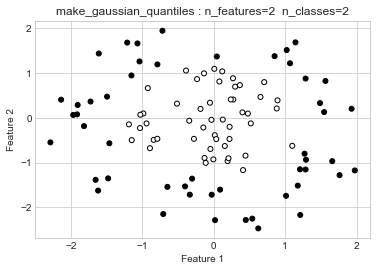

In [20]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-whitegrid')
plt.title("make_gaussian_quantiles : n_features=2  n_classes=2")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### sample21
- 点を学習用と評価用に分類
- 習用データ 0.7 テスト用データ 0.3

In [21]:
# データの分割を行う（学習用データ 0.7 テスト用データ 0.3）
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### sample22
- SVCによる学習と分類

In [22]:
clf = svm.SVC()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

### sample23
- 混同行列を求める

In [23]:
# X_testの値から予測結果を得る
Y_pred = clf.predict(X_test)
# 混同行列（confusion matrix）
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[14,  0],
       [ 2, 14]], dtype=int64)

### sample24
- 各種パラメータの計算

In [24]:
# 各種パラメータの計算
print("正解率:{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred)))
print("適合率:{}".format(precision_score(y_true=Y_test, y_pred=Y_pred)))
print("再現率:{}".format(recall_score(y_true=Y_test, y_pred=Y_pred)))
print("F1スコア:{}".format(f1_score(y_true=Y_test, y_pred=Y_pred)))

正解率:0.9333333333333333
適合率:1.0
再現率:0.875
F1スコア:0.9333333333333333


### sample25
- 2つのクラスの境界線を描画
- 等高線で境界を分類

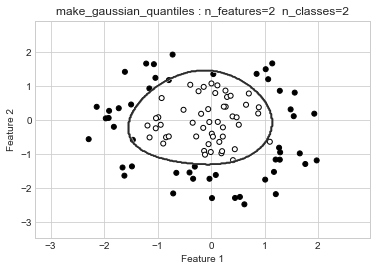

In [25]:
import matplotlib
import matplotlib.pyplot as plt
plt.title("make_gaussian_quantiles : n_features=2  n_classes=2")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# 2Dグラフの軸の範囲を決める
x1_min , x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min , x2_max = X[:,1].min()-1, X[:,1].max()+1
# 2Dグラフ上にグリッドポイントを作成する
resolution = 0.02
x1 = np.arange(x1_min,x1_max,resolution)
x2 = np.arange(x2_min,x2_max,resolution)
xx1,xx2 = np.meshgrid(x1,x2)
# グリッドポイント全てに学習モデルを適用
# classifierは学習したモデル
# 各特徴量を1次元配列に変換して予測を実行
Z = clf.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
#予測結果を元のグリッドポイントのデータサイズに変換
Z = Z.reshape(xx1.shape)
#グリッドポイントの等高線のプロット
plt.contour(xx1,xx2,Z)
plt.show()

## 4.xx1、xx2の変形の過程

### sample26
- xx1のデータの中身

In [26]:
xx1

array([[-3.28763993, -3.26763993, -3.24763993, ...,  2.93236007,
         2.95236007,  2.97236007],
       [-3.28763993, -3.26763993, -3.24763993, ...,  2.93236007,
         2.95236007,  2.97236007],
       [-3.28763993, -3.26763993, -3.24763993, ...,  2.93236007,
         2.95236007,  2.97236007],
       ...,
       [-3.28763993, -3.26763993, -3.24763993, ...,  2.93236007,
         2.95236007,  2.97236007],
       [-3.28763993, -3.26763993, -3.24763993, ...,  2.93236007,
         2.95236007,  2.97236007],
       [-3.28763993, -3.26763993, -3.24763993, ...,  2.93236007,
         2.95236007,  2.97236007]])

### sample27
- xx1のデータの構造
- 321×314の2次元配列

In [27]:
xx1.shape

(321, 314)

### sample28
- xx2のデータの中身

In [28]:
xx2

array([[-3.46952308, -3.46952308, -3.46952308, ..., -3.46952308,
        -3.46952308, -3.46952308],
       [-3.44952308, -3.44952308, -3.44952308, ..., -3.44952308,
        -3.44952308, -3.44952308],
       [-3.42952308, -3.42952308, -3.42952308, ..., -3.42952308,
        -3.42952308, -3.42952308],
       ...,
       [ 2.89047692,  2.89047692,  2.89047692, ...,  2.89047692,
         2.89047692,  2.89047692],
       [ 2.91047692,  2.91047692,  2.91047692, ...,  2.91047692,
         2.91047692,  2.91047692],
       [ 2.93047692,  2.93047692,  2.93047692, ...,  2.93047692,
         2.93047692,  2.93047692]])

### sample29
- xx2のデータの構造
- 321×314の2次元配列

In [29]:
xx2.shape

(321, 314)

### sample30
- xx1の一次元化
- ravel()メソッドを利用

In [30]:
xx1.ravel()

array([-3.28763993, -3.26763993, -3.24763993, ...,  2.93236007,
        2.95236007,  2.97236007])

### sample31
- xx2の一次元化
- ravel()メソッドを利用

In [31]:
xx2.ravel()

array([-3.46952308, -3.46952308, -3.46952308, ...,  2.93047692,
        2.93047692,  2.93047692])

### sample32
- xx1、xx2を一次元化したものを成分とした2次元配列の作成

In [32]:
np.array([xx1.ravel(),xx2.ravel()])

array([[-3.28763993, -3.26763993, -3.24763993, ...,  2.93236007,
         2.95236007,  2.97236007],
       [-3.46952308, -3.46952308, -3.46952308, ...,  2.93047692,
         2.93047692,  2.93047692]])

### sample33
- **sample32**で得られたものを転置

In [33]:
np.array([xx1.ravel(),xx2.ravel()]).T

array([[-3.28763993, -3.46952308],
       [-3.26763993, -3.46952308],
       [-3.24763993, -3.46952308],
       ...,
       [ 2.93236007,  2.93047692],
       [ 2.95236007,  2.93047692],
       [ 2.97236007,  2.93047692]])

### sample34
- **sample33**で得られたデータから予測値を得る

In [34]:
Z = clf.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
Z

array([1, 1, 1, ..., 1, 1, 1])

### sample35
- Zをxx1,xx2と同じ形に変形する

In [35]:
Z = Z.reshape(xx1.shape)
Z

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

### sample36
- xx1,xx2とZが同じ形になっていることを確認

In [36]:
Z.shape

(321, 314)